<a href="http://laf-fabric.readthedocs.org/en/latest/" target="_blank"><img align="left" src="images/laf-fabric-xsmall.png"/></a>
<a href="http://www.persistent-identifier.nl/?identifier=urn%3Anbn%3Anl%3Aui%3A13-048i-71" target="_blank"><img align="left"src="images/etcbc4easy-small.png"/></a>
<a href="http://www.godgeleerdheid.vu.nl/etcbc" target="_blank"><img align="right" src="images/VU-ETCBC-xsmall.png"/></a>
<a href="https://www.academic-bible.com/en/online-bibles/biblia-hebraica-stuttgartensia-bhs/read-the-bible-text/" target="_blank"><img align="right" src="files/images/DBG-xsmall.png"/></a>

<img align="right" width="50%" src="files/images/parallel.png"/>

# Parallel Passages in the MT

# 0. Introduction

## 0.1 Motivation
We want to make a list of **all** parallel passages in the Masoretic Text (MT) of the Hebrew Bible.

Here is a quote that triggered Dirk to write this notebook:

> Finally, the Old Testament Parallels module in Accordance is a helpful resource that enables the researcher to examine 435 sets of parallel texts, or in some cases very similar wording in different texts, in both the MT and translation, but the large number of sets of texts in this database should not fool one to think it is complete or even nearly complete for all parallel writings in the Hebrew Bible.

Robert Rezetko and Ian Young.
    Historical linguistics & Biblical Hebrew. Steps Toward an Integrated Approach.
    *Ancient Near East Monographs, Number9*. SBL Press Atlanta. 2014. 
    [PDF Open access available](https://www.google.nl/url?sa=t&rct=j&q=&esrc=s&source=web&cd=2&ved=0CCgQFjAB&url=http%3A%2F%2Fwww.sbl-site.org%2Fassets%2Fpdfs%2Fpubs%2F9781628370461_OA.pdf&ei=2QSdVf-vAYSGzAPArJeYCg&usg=AFQjCNFA3TymYlsebQ0MwXq2FmJCSHNUtg&sig2=LaXuAC5k3V7fSXC6ZVx05w&bvm=bv.96952980,d.bGQ)

## 0.3 Open Source
This is an IPython notebook. 
It contains a working program to carry out the computations needed to obtain the results reported here.

You can download this notebook and run it on your computer, provided you have
[LAF-Fabric](http://laf-fabric.readthedocs.org/en/latest/texts/welcome.html) installed.
An easy way to do that is describe [here](laf-fabric.readthedocs.org/texts/getting-started.html).

It is a pity that we cannot compare our results with the Accordance resource mentioned above, since that resource has not been published in an accessible manner. We also do not have the information how this resource has been constructed on the basis of the raw data. In contrast with that, we present our results in a completely reproducible manner. This notebook itself can serve as the method of replication, provided you have obtained the necessary resources. See [SHEBANQ sources](https://shebanq.ancient-data.org/sources), which are all Open Access.

## 0.4 What are parallel passages?
The notion of *parallel passage* is not a simple, straightforward one.
There are parallels on the basis of lexical content in the passages on the one hand, 
but on the other hand there are also correspondences in certain syntactical structures, 
or even in similarities in text structure.

In this notebook we do select a straightforward notion of parallel, based on lexical content only.
We investigate two measures of similarity, one that ignores word order completely, and one that takes word order into account.

Two kinds of short-comings of this approach must be mentioned:

1. We will not find parallels based on non-lexical criteria (unless they are also lexical parallels)
1. We will find too many parallels: certain short sentences (and he said), or formula like passages (and the word of God came to Moses) occur so often that they have a more subtle bearing on whether there is a common text history.

For a more full treatment of parallel passages, see

Wido Th. van Peursen and Eep Talstra.
  Computer-Assisted Analysis of Parallel Texts in the Bible - 
  The Case of 2 Kings xviii-xix and its Parallels in Isaiah and Chronicles.
  Vetus Testamentum</i> 57, pp. 45-72.
  2007, Brill, Leiden.
  
Note that our method fails to identify any parallels with Chronica_II 32. Van Peursen and Talstra state about this chapter and 2 Kings 18: 

> These chapters differ so much, that it is sometimes impossible to establish which verses should be considered parallel.

In this notebook we produce a set of *cliques*, a clique being a set of passages that are *quite* similar, based on lexical information.


## 0.5 Authors
This notebook is by Dirk Roorda and owes a lot to discussions with Martijn Naaijer.

[Dirk Roorda](mailto:dirk.roorda@dans.knaw.nl) while discussing ideas with 
[Martijn Naaijer](mailto:m.naaijer@vu.nl). 


## 0.6 Status

**Last modified: 2016-03-03** Added experiments based on chapter chunks and lower similarities.

165 experiments have been carried out, of which 18 with promising results.
All results can be easily inspected, just by clicking in your browser.
One of the experiments has been chosen as the basis for
[crossref](https://shebanq.ancient-data.org/hebrew/note?version=4b&id=Mnxjcm9zc3JlZg__&tp=txt_tb1&nget=v)
annotations in SHEBANQ.

# 1. Results

Click in a green cell to see interesting results. The numbers in the cell indicate

* the number of passages that have a variant elsewhere
* the number of *cliques* they form (cliques are sets of similar passages)
* the number of passages in the biggest clique

Below the results is an account of the method that we used, followed by the actual code to produce these results.

In [17]:
# run this cell after all other cells
HTML(other_exps)

# 2. Experiments

We have conducted 165 experiments, all corresponding to a specific choice of parameters.
Every experiment is an attempt to identify variants and collect them in *cliques*.

The table gives an overview of the experiments conducted.

Every *row* corresponds to a particular way of chunking and a method of measuring the similarity.

There are *columns* for each similarity *threshold* that we have tried.
The idea is that chunks are similar if their similarity is above the threshold.

The outcomes of one experiment have been added to SHEBANQ as the note set
[crossref](https://shebanq.ancient-data.org/hebrew/note?version=4b&id=Mnxjcm9zc3JlZg__&tp=txt_tb1&nget=v).
The experiment chosen for this is currently

* *chunking*: **object verse**
* *similarity method*: **SET**
* *similarity threshold*: **65**


## 2.1 Assessing the outcomes

Not all experiments lead to useful results.
We have indicated the value of a result by a color coding, based on objective characteristics,
such as the number of parallel passages, the number of cliques, the size of the greatest clique, and the way of chunking.
These numbers are shown in the cells.

### 2.1.1 Assessment criteria

If the method is based on *fixed* chunks, we deprecated the method and the results.
Because two perfectly similar verses could be missed if a 100-word wide window that shifts over the text aligns differently with both verses, which will usually be the case.

Otherwise, we consider the *ll*, the length of the longest clique, and *nc*, the number of cliques.
We set three quality parameters:
* `REC_CLIQUE_RATIO` =  5 : recommended clique ratio
* `DUB_CLIQUE_RATIO` = 15 : dubious clique ratio
* `DEP_CLIQUE_RATIO` = 25 : deprecated clique ratio

where the *clique ratio* is $100 (ll/nc)$, 
i.e. the length of the longest clique divided by the number of cliques as percentage.

An experiment is *recommended* if its clique ratio is between the recommended and dubious clique ratios.

It is *dubious* if its clique ratio is between the dubious and deprecated clique ratios.

It is *deprecated* if its clique ratio is above the deprecated clique ratio.

# 2.2 Inspecting results
If you click on the hyperlink in the cell, you are taken to a page that gives you
all the details of the results:

1. A link to a file with all *cliques* (which are the sets of similar passages)
1. A list of links to chapter-by-chapter diff files (for cliques with just two members), and only for
   experiments with outcomes that are labeled as *promising* or *unassessed quality* or *mixed results*.

To get into the variants quickly, inspect the list (2) and click through 
to see the actual variant material in chapter context.

Not all variants occur here, so continue with (1) to see the remaining cliques.

Sometimes in (2) a chapter diff file does not indicate clearly the relevant common part of both chapters.
In that case you have to consult the big list (1)

All these results can be downloaded from the
[SHEBANQ github repo](https://github.com/ETCBC/shebanq/tree/master/static/docs/tools/parallel/files)
After downloading the whole directory, open ``experiments.html`` in your browser.

# 3. Method

Here we discuss the method we used to arrive at a list of parallel passages 
in the Masoretic Text (MT) of the Hebrew Bible.

## 3.1 Similarity

We have to find passages in the MT that are *similar*.
Therefore we *chunk* the text in some way, and then compute the similarities between pairs of chunks.

There are many ways to define and compute similarity between texts.
Here, we have tried two methods ``SET`` and ``LCS``.
Both methods define similarity as the fraction of common material with respect to the total material.

### 3.1.1 SET

The ``SET`` method reduces textual chunks to *sets* of *lexemes*.
This method abstracts from the order and number of occurrences of words in chunks.

We use as measure for the similarity of chunks $C_1$ and $C_2$ (taken as sets):

$$ s_{\rm set}(C_1, C_2) = {\vert C_1 \cap C_2\vert \over \vert C_1 \cup C_2 \vert} $$

where $\vert X \vert$ is the number of elements in set $X$.

### 3.1.2 LCS

The ``LCS`` method is less reductive: chunks are *strings* of *lexemes*, 
so the order and number of occurrences of words is retained.

We use as measure for the similarity of chunks $C_1$ and $C_2$ (taken as strings):

$$ s_{\rm lcs}(C_1, C_2) = {\vert {\rm LCS}(C_1,C_2)\vert \over \vert C_1\vert + \vert C_2 \vert - 
\vert {\rm LCS}(C_1,C_2)\vert} $$

where ${\rm LCS}(C_1, C_2)$ is the
[longest common subsequence](https://en.wikipedia.org/wiki/Longest_common_subsequence_problem)
of $C_1$ and $C_2$ and
$\vert X\vert$ is the length of sequence $X$.

It remains to be seen whether we need the extra sophistication of ``LCS``.
The risk is that ``LCS`` could fail to spot related passages when there is a large amount of transposition going on.
The results should have the last word. 

We need to compute the LCS efficiently, and for this we used the python ``Levenshtein`` module:

``pip install python-Levenshtein``

whose documentation is
[here](http://www.coli.uni-saarland.de/courses/LT1/2011/slides/Python-Levenshtein.html).

## 3.2 Performance

Similarity computation is the part where the heavy lifting occurs.
It is basically quadratic in the number of chunks, so if you have verses as chunks (~ 23,000),
you need to do ~ 270,000,000 similarity computations, and if you use sentences (~ 64,000), 
you need to do ~ 2,000,000,000 ones!
The computation of a single similarity should be *really* fast.

Besides that, we use two ways to economize:

* after having computed a matrix for a specific set of parameter values, we save the matrix to disk;
  new runs can load the matrix from disk in a matter of seconds;
* we do not store low similarity values in the matrix, low being < ``MATRIX_THRESHOLD``.

The ``LCS`` method is more complicated.
We have tried the ``ratio`` method from the ``difflib`` package that is present in the standard python distribution.
This is unbearably slow for our purposes.
The ``ratio`` method in the ``Levenshtein`` package is much quicker.

See the table for an indication of the amount of work to create the similarity matrix
and the performance per similarity method.

The *matrix threshold* is the lower bound of similarities that are stored in the matrix.
If a pair of chunks has a lower similarity, no entry will be made in the matrix.

The computing has been done on a Macbook Air (11", mid 2012, 1.7 GHz Intel Core i5, 8GB RAM).

|chunk type |chunk size|similarity method|matrix threshold|# of comparisons|size of matrix (KB)|computing time (min)|
|:----------|---------:|----------------:|---------------:|---------------:|------------------:|-------------------:|
|fixed      |100       |LCS              |60              |       9,003,646|                  7|                  ? |
|fixed      |100       |SET              |50              |       9,003,646|                  7|                  ? |
|fixed      |50        |LCS              |60              |      36,197,286|                 37|                  ? |
|fixed      |50        |SET              |50              |      36,197,286|                 18|                  ? |
|fixed      |20        |LCS              |60              |     227,068,705|              2,400|                  ? |
|fixed      |20        |SET              |50              |     227,068,705|                113|                  ? |
|fixed      |10        |LCS              |60              |     909,020,841|             59,000|                  ? |
|fixed      |10        |SET              |50              |     909,020,841|              1,800|                  ? |
|object     |verse     |LCS              |60              |     269,410,078|              2,300|                  31|
|object     |verse     |SET              |50              |     269,410,078|                509|                  14|
|object     |half_verse|LCS              |60              |   1,016,396,241|             40,000|                  50|
|object     |half_verse|SET              |50              |   1,016,396,241|              3,600|                  41|
|object     |sentence  |LCS              |60              |   2,055,975,750|            212,000|                  68|
|object     |sentence  |SET              |50              |   2,055,975,750|             82,000|                  63|

# 4. Workflow

## 4.1 Chunking

There are several ways to chunk the text:

* fixed chunks of approximately ``CHUNK_SIZE`` words
* by object, such as verse, sentence and even chapter

After chunking, we prepare the chunks for similarity measuring.

### 4.1.1 Fixed chunking
Fixed chunking is unnatural, but if the chunk size is small, it can yield fair results.
The results are somewhat difficult to inspect, because they generally do not respect constituent boundaries.
It is to be expected that fixed chunks in variant passages will be mutually *out of phase*, 
meaning that the chunks involved in these passages are not aligned with each other.
So they will have a lower similarity than they could have if they were aligned.
This is a source of artificial noise in the outcome and/or missed cases.

If the chunking respects "natural" boundaries in the text, there is far less misalignment.

### 4.1.2 Object chunking
We can also chunk by object, such as verse, half_verse or sentence.

Chunking by *verse* is very much like chunking in fixed chunks of size 20, performance-wise.

Chunking by *half_verse* is comparable to fixed chunks of size 10.

Chunking by *sentence* will generate an enormous amount of
false positives, because there are very many very short sentences (down to 1-word) in the text.
Besides that, the performance overhead is huge.

The *half_verses* seem to be a very interesting candidate. 
They are smaller than verses, but there are less *degenerate cases* compared to with sentences. 
From the table above it can be read that half verses require only half as many similarity computations as sentences.


## 4.2 Preparing

We prepare the chunks for the application of the chosen method of similarity computation (``SET`` or ``LCS``).

In both cases we reduce the text to a sequence of transliterated consonantal *lexemes* without disambiguation.
In fact, we go one step further: we remove the consonants (alef, wav, yod) that are often silent.

For ``SET``, we represent each chunk as the set of its reduced lexemes.

For ``LCS``, we represent each chunk as the string obtained by joining its reduced lexemes separated by white spaces.

## 4.3 Cliques

After having computed a sufficient part of the similarity matrix, we set a value for ``SIMILARITY_THRESHOLD``.
All pairs of chunks having at least that similarity are deemed *interesting*.

We organize the members of such pairs in *cliques*, groups of chunks of which each member is 
similar (*similarity* > ``SIMILARITY_THRESHOLD``) to at least one other member.

We start with no cliques and walk through the pairs whose similarity is above ``SIMILARITY_THRESHOLD``, 
and try to put each member into a clique.

If there is not yet a clique, we make the member in question into a new singleton clique.

If there are cliques, we find the cliques that have a member similar to the member in question.
If we find several, we merge them all into one clique.

If there is no such clique, we put the member in a new singleton clique.

NB: Cliques may *drift*, meaning that they contain members that are completely different from each other.
They are in the same clique, because there is a path of pairwise similar members leading from the one chunk to the other.

### 4.3.1 Organizing the cliques
In order to accomodate cases where there are many corresponding verses in corresponding chapters, we produce
chapter-by-chapter diffs in the following way.

We make a list of all chapters that are involved in cliques.
This yields a list of chapter cliques.
For all *binary* chapters cliques, we generate a colorful diff rendering (as html) for the complete two chapters.

We only do this for *promising* experiments.

### 4.3.2 Evaluating clique sets

Not all clique sets are equally worth while.
For example, if we set the ``SIMILARITY_THRESHOLD`` too low, we might get one gigantic clique, especially
in combination with a fine-grained chunking. In other words: we suffer from *clique drifting*.

We detect clique drifting by looking at the size of the largest clique.
If that is large compared to the total number of chunks, we deem the results unsatisfactory.

On the other hand, when the ``SIMILARITY_THRESHOLD`` is too high, you might miss a lot of correspondences,
especially when chunks are large, or when we have fixed-size chunks that are out of phase.

We deem the results of experiments based on a partioning into fixed length chunks as unsatisfactory, although it
might be interesting to inspect what exactly the damage is.

At the moment, we have not yet analysed the relative merits of the similarity methods ``SET`` and ``LCS``.

# 5. Implementation


The rest is code. From here we fire up the engines and start computing.

In [1]:
import sys, os, re, collections, pickle, math, difflib, glob

from IPython.display import HTML, display
import matplotlib.pyplot as plt
%matplotlib inline
PICKLE_PROTOCOL = 3

from difflib import SequenceMatcher
from Levenshtein import ratio

from tf.fabric import Fabric

## 5.1 Loading the feature data

We load the features we need from the ETCBC database.

In [2]:
source = 'etcbc'
version = '4c'
ETCBC = 'hebrew/{}{}'.format(source, version)
TF = Fabric( modules=ETCBC )

This is Text-Fabric 1.2.7
Api reference : https://github.com/ETCBC/text-fabric/wiki/Api
Tutorial      : https://github.com/ETCBC/text-fabric/blob/master/docs/tutorial.ipynb
Data sources  : https://github.com/ETCBC/text-fabric-data
Data docs     : https://etcbc.github.io/text-fabric-data/features/hebrew/etcbc4c/0_overview.html
Shebanq docs  : https://shebanq.ancient-data.org/text
Slack team    : https://shebanq.slack.com/signup
Questions? Ask shebanq@ancient-data.org for an invite to Slack
107 features found and 0 ignored


In [3]:
api = TF.load('''
    otype
    lex g_word_utf8 trailer_utf8
    book chapter verse label number
''')
api.makeAvailableIn(globals())

  0.00s loading features ...
   |     0.05s B otype                from /Users/dirk/github/text-fabric-data/hebrew/etcbc4c
   |     0.00s M otext                from /Users/dirk/github/text-fabric-data/hebrew/etcbc4c
   |     0.01s B book                 from /Users/dirk/github/text-fabric-data/hebrew/etcbc4c
   |     0.01s B chapter              from /Users/dirk/github/text-fabric-data/hebrew/etcbc4c
   |     0.01s B verse                from /Users/dirk/github/text-fabric-data/hebrew/etcbc4c
   |     0.48s B g_word_utf8          from /Users/dirk/github/text-fabric-data/hebrew/etcbc4c
   |     0.09s B trailer_utf8         from /Users/dirk/github/text-fabric-data/hebrew/etcbc4c
   |     0.14s B lex                  from /Users/dirk/github/text-fabric-data/hebrew/etcbc4c
   |     0.02s B label                from /Users/dirk/github/text-fabric-data/hebrew/etcbc4c
   |     0.25s B number               from /Users/dirk/github/text-fabric-data/hebrew/etcbc4c
  5.23s All features loaded/com

## 5.2 Configuration

Here are the parameters on which the results crucially depend.

There are also parameters that control the reporting of the results, such as file locations.

In [4]:
# chunking
CHUNK_LABELS = {True: 'fixed', False: 'object'}
CHUNK_LBS = {True: 'F', False: 'O'}
CHUNK_SIZES = (100, 50, 20, 10)
CHUNK_OBJECTS = ('chapter', 'verse','half_verse','sentence')

# preparing
EXCLUDED_CONS = '[>WJ=/\[]'             # weed out weak consonants
EXCLUDED_PAT = re.compile(EXCLUDED_CONS)

# similarity
MATRIX_THRESHOLD = 50
SIM_METHODS = ('SET', 'LCS')
SIMILARITIES = (100, 95, 90, 85, 80, 75, 70, 65, 60, 55, 50, 45, 40, 35, 30)

# printing
DEP_CLIQUE_RATIO = 25
DUB_CLIQUE_RATIO = 15
REC_CLIQUE_RATIO =  5
LARGE_CLIQUE_SIZE = 50
CLIQUES_PER_FILE = 50

# assessing results
VALUE_LABELS = dict(
    mis='no results available',
    rec='promising results: recommended',
    dep='messy results: deprecated',
    dub='mixed quality: take care',
    out='method deprecated',
    nor='unassessed quality: inspection needed',
    lr='this experiment is the last one run',
)

# crossrefs for SHEBANQ
SHEBANQ_MATRIX = (False, 'verse', 'SET')
SHEBANQ_SIMILARITY = 65
SHEBANQ_TOOL = 'parallel'
CROSSREF_STATUS = '!'
CROSSREF_KEYWORD = 'crossref'

# progress indication
VERBOSE = False
MEGA = 1000000
KILO = 1000
SIMILARITY_PROGRESS = 5 * MEGA
CLIQUES_PROGRESS = 1 * KILO

# locations and hyperlinks
LOCAL_BASE_COMP = '/Users/dirk/tf/text-fabric-output/{}{}/parallels'.format(source, version)
LOCAL_BASE_OUTP = 'files'
EXPERIMENT_DIR = 'experiments'
EXPERIMENT_FILE = 'experiments'
EXPERIMENT_PATH = '{}/{}.txt'.format(LOCAL_BASE_OUTP, EXPERIMENT_FILE)
EXPERIMENT_HTML = '{}/{}.html'.format(LOCAL_BASE_OUTP, EXPERIMENT_FILE)
NOTES_FILE = 'crossref'
NOTES_PATH = '{}/{}.csv'.format(LOCAL_BASE_OUTP, NOTES_FILE)
STORED_CLIQUE_DIR = 'stored/cliques'
STORED_MATRIX_DIR = 'stored/matrices'
STORED_CHUNK_DIR = 'stored/chunks'
CHAPTER_DIR = 'chapters'
CROSSREF_DB_FILE = 'crossrefdb.csv'
CROSSREF_DB_PATH = '{}/{}'.format(LOCAL_BASE_OUTP, CROSSREF_DB_FILE)

## 5.3 Experiment settings

For each experiment we have to adapt the configuration settings to the parameters that define the experiment.

In [5]:
def reset_params():
    global CHUNK_FIXED, CHUNK_SIZE, CHUNK_OBJECT, CHUNK_LB, CHUNK_DESC
    global SIMILARITY_METHOD, SIMILARITY_THRESHOLD, MATRIX_THRESHOLD
    global meta
    meta = collections.OrderedDict()
    
    # chunking
    CHUNK_FIXED = None                      # kind of chunking: fixed size or by object
    CHUNK_SIZE = None                       # only relevant for CHUNK_FIXED = True
    CHUNK_OBJECT = None                     # only relevant for CHUNK_FIXED = False; see CHUNK_OBJECTS in next cell
    CHUNK_LB = None                         # computed from CHUNK_FIXED, CHUNK_SIZE, CHUNK_OBJ
    CHUNK_DESC = None                       # computed from CHUNK_FIXED, CHUNK_SIZE, CHUNK_OBJ
    # similarity
    MATRIX_THRESHOLD = None                 # minimal similarity used to fill the matrix of similarities
    SIMILARITY_METHOD = None                # see SIM_METHODS in next cell
    SIMILARITY_THRESHOLD = None             # minimal similarity used to put elements together in cliques
    meta = collections.OrderedDict()

def set_matrix_threshold(sim_m=None, chunk_o=None):
    global MATRIX_THRESHOLD
    the_sim_m = SIMILARITY_METHOD if sim_m == None else sim_m
    the_chunk_o = CHUNK_OBJECT if chunk_o == None else chunk_o
    MATRIX_THRESHOLD = 50 if the_sim_m == 'SET' else 60
    if the_sim_m == 'SET':
        if the_chunk_o == 'chapter': MATRIX_THRESHOLD = 30
        else: MATRIX_THRESHOLD = 50
    else:
        if the_chunk_o == 'chapter': MATRIX_THRESHOLD = 55
        else: MATRIX_THRESHOLD = 60

def do_params_chunk(chunk_f, chunk_i):
    global CHUNK_FIXED, CHUNK_SIZE, CHUNK_OBJECT, CHUNK_LB, CHUNK_DESC
    do_chunk = False
    if chunk_f != CHUNK_FIXED or (chunk_f and chunk_i != CHUNK_SIZE) or (not chunk_f and chunk_i != CHUNK_OBJECT):
        do_chunk = True
        CHUNK_FIXED = chunk_f
        if chunk_f: CHUNK_SIZE = chunk_i
        else: CHUNK_OBJECT = chunk_i

    CHUNK_LB = CHUNK_LBS[CHUNK_FIXED]
    CHUNK_DESC = CHUNK_SIZE if CHUNK_FIXED else CHUNK_OBJECT

    for p in (
        '{}/{}'.format(LOCAL_BASE_OUTP, EXPERIMENT_DIR),
        '{}/{}'.format(LOCAL_BASE_COMP, STORED_CHUNK_DIR),
    ):
        if not os.path.exists(p): os.makedirs(p)

    return do_chunk

def do_params(chunk_f, chunk_i, sim_m, sim_thr):
    global CHUNK_FIXED, CHUNK_SIZE, CHUNK_OBJECT, CHUNK_LB, CHUNK_DESC
    global SIMILARITY_METHOD, SIMILARITY_THRESHOLD, MATRIX_THRESHOLD
    global meta
    do_chunk = False
    do_prep = False
    do_sim = False
    do_clique = False
    
    meta = collections.OrderedDict()
    if chunk_f != CHUNK_FIXED or (chunk_f and chunk_i != CHUNK_SIZE) or (not chunk_f and chunk_i != CHUNK_OBJECT):
        do_chunk = True
        do_prep = True
        do_sim = True
        do_clique = True
        CHUNK_FIXED = chunk_f
        if chunk_f: CHUNK_SIZE = chunk_i
        else: CHUNK_OBJECT = chunk_i
    if sim_m != SIMILARITY_METHOD:
        do_prep = True
        do_sim = True
        do_clique = True
        SIMILARITY_METHOD = sim_m
    if sim_thr != SIMILARITY_THRESHOLD:
        do_clique = True
        SIMILARITY_THRESHOLD = sim_thr
    set_matrix_threshold()
    if SIMILARITY_THRESHOLD < MATRIX_THRESHOLD : return (False, False, False, False, True)

    CHUNK_LB = CHUNK_LBS[CHUNK_FIXED]
    CHUNK_DESC = CHUNK_SIZE if CHUNK_FIXED else CHUNK_OBJECT

    meta['CHUNK TYPE'] = 'FIXED {}'.format(CHUNK_SIZE) if CHUNK_FIXED else 'OBJECT {}'.format(CHUNK_OBJECT)
    meta['MATRIX THRESHOLD'] = MATRIX_THRESHOLD
    meta['SIMILARITY METHOD'] = SIMILARITY_METHOD
    meta['SIMILARITY THRESHOLD'] = SIMILARITY_THRESHOLD
    
    
    for p in (
        '{}/{}'.format(LOCAL_BASE_OUTP, EXPERIMENT_DIR),
        '{}/{}'.format(LOCAL_BASE_OUTP, CHAPTER_DIR),
        '{}/{}'.format(LOCAL_BASE_COMP, STORED_CLIQUE_DIR),
        '{}/{}'.format(LOCAL_BASE_COMP, STORED_MATRIX_DIR),
        '{}/{}'.format(LOCAL_BASE_COMP, STORED_CHUNK_DIR),
    ):
        if not os.path.exists(p): os.makedirs(p)

    return (do_chunk, do_prep, do_sim, do_clique, False)

reset_params()

## 5.4 Chunking

We divide the text into chunks to be compared. The result is ``chunks``,
which is a list of lists.
Every chunk is a list of word nodes.

In [6]:
def chunking(do_chunk):
    global chunks, book_rank
    if not do_chunk:
        info('CHUNKING ({} {}): already chunked into {} chunks'.format(CHUNK_LB, CHUNK_DESC, len(chunks)))
        meta['# CHUNKS'] = len(chunks)
        return

    chunk_path = '{}/{}/chunk_{}_{}'.format(
        LOCAL_BASE_COMP, STORED_CHUNK_DIR,
        CHUNK_LB, CHUNK_DESC,
    )

    if os.path.exists(chunk_path):
        with open(chunk_path, 'rb') as f: chunks = pickle.load(f)
        info('CHUNKING ({} {}): Loaded: {:>5} chunks'.format(
            CHUNK_LB, CHUNK_DESC,
            len(chunks),
        ))
    else:
        info('CHUNKING ({} {})'.format(CHUNK_LB, CHUNK_DESC))
        chunks = []
        book_rank = {}
        for b in F.otype.s('book'):
            book_name = F.book.v(b)
            book_rank[book_name] = b
            words = L.d(b, otype='word')
            nwords = len(words)
            if CHUNK_FIXED:
                nchunks = nwords // CHUNK_SIZE
                if nchunks == 0: 
                    nchunks = 1
                    common_incr = nwords
                    special_incr = 0
                else:            
                    rem = nwords % CHUNK_SIZE
                    common_incr = rem // nchunks
                    special_incr = rem % nchunks
                word_in_chunk = -1
                cur_chunk = -1
                these_chunks = []

                for w in words:
                    word_in_chunk += 1
                    if word_in_chunk == 0 or (word_in_chunk >= CHUNK_SIZE + common_incr + (1 if cur_chunk < special_incr else 0)):
                        word_in_chunk = 0
                        these_chunks.append([])
                        cur_chunk += 1
                    these_chunks[-1].append(w)
            else:
                these_chunks = [L.d(c, otype='word') for c in L.d(b, otype=CHUNK_OBJECT)]

            chunks.extend(these_chunks)

            chunkvolume = sum(len(c) for c in these_chunks)
            if VERBOSE:
                info('CHUNKING ({} {}): {:<20s} {:>5} words; {:>5} chunks; sizes {:>5} to {:>5}; {:>5}'.format(
                    CHUNK_LB, CHUNK_DESC,
                    book_name, nwords, len(these_chunks), 
                    min(len(c) for c in these_chunks), 
                    max(len(c) for c in these_chunks),
                    'OK' if chunkvolume == nwords else 'ERROR',
                ))
        with  open(chunk_path, 'wb') as f: pickle.dump(chunks, f, protocol=PICKLE_PROTOCOL)
    info('CHUNKING ({} {}): Made {} chunks'.format(CHUNK_LB, CHUNK_DESC, len(chunks)))
    meta['# CHUNKS'] = len(chunks)

## 5.5 Preparing

In order to compute similarities between chunks, we have to compile each chunk into the information that really matters for the comparison. This is dependent on the chosen method of similarity computing.

### 5.5.1 Preparing for SET comparison

We reduce words to their lexemes (dictionary entries) and from them we also remove the alef, waw, and yods.
The lexeme feature also contains characters (`/ [ =`) to disambiguate homonyms. We also remove these.
If we end up with something empty, we skip it.
Eventually, we take the set of these reduced word lexemes, so that we effectively ignore order and multiplicity of words. In other words: the resulting similarity will be based on lexeme content.

### 5.5.2 Preparing for LCS comparison

Again, we reduce words to their lexemes as for the SET preparation, and we do the same weeding of consonants and empty strings. But then we concatenate everything, separated by a space. So we preserve order and multiplicity.

In [7]:
def preparing(do_prepare):
    global chunk_data
    if not do_prepare:
        info('PREPARING ({} {} {}): Already prepared'.format(CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD))
        return
    info('PREPARING ({} {} {})'.format(CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD))
    chunk_data = []
    if SIMILARITY_METHOD == 'SET':
        for c in chunks:
            words = (EXCLUDED_PAT.sub('', F.lex.v(w).replace('<', 'O')) for w in c)
            clean_words = (w for w in words if w != '')
            this_data = frozenset(clean_words)
            chunk_data.append(this_data)
    else:
        for c in chunks:
            words = (EXCLUDED_PAT.sub('', F.lex.v(w).replace('<', 'O')) for w in c)
            clean_words = (w for w in words if w != '')
            this_data = ' '.join(clean_words)
            chunk_data.append(this_data)
    info('PREPARING ({} {} {}): Done {} chunks.'.format(CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, len(chunk_data)))

## 5.6 Similarity computation

Here we implement our two ways of similarity computation.
Both need a massive amount of work, especially for experiments with many small chunks.
The similarities are stored in a ``matrix``, a data structure that stores a similarity number for each pair of chunk indices.
Most pair of chunks will be dissimilar. In order to save space, we do not store similarities below a certain threshold.
We store matrices for re-use.

### 5.6.1 SET similarity
The core is an operation on the sets, associated with the chunks by the prepare step. We take the cardinality of the intersection divided by the cardinality of the union.
Intuitively, we compute the proportion of what two chunks have in common against their total material.

In case the union is empty (both chunks have yielded an empty set), we deem the chunks not to be interesting as a parallel pair, and we set the similarity to 0.

### 5.6.2 LCS similarity
The core is the method `ratio()`, taken from the Levenshtein module. 
Remember that the preparation step yielded a space separated string of lexemes, and these strings are compared on the basis of edit distance.

In [8]:
def similarity_post():
    nequals = len({x for x in chunk_dist if chunk_dist[x] >= 100})
    cmin = min(chunk_dist.values()) if len(chunk_dist) else '!empty set!'
    cmax = max(chunk_dist.values()) if len(chunk_dist) else '!empty set!'
    meta['LOWEST  AVAILABLE SIMILARITY'] = cmin
    meta['HIGHEST AVAILABLE SIMILARITY'] = cmax
    meta['# EQUAL COMPARISONS'] = nequals
    info('SIMILARITY ({} {} {} M>{}): similarities between {} and {}. {} are 100%'.format(
        CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD,
        cmin, cmax, nequals,
    ))
    
def similarity(do_sim):
    global chunk_dist
    total_chunks = len(chunks) 
    total_distances = total_chunks * (total_chunks - 1) // 2
    meta['# SIMILARITY COMPARISONS'] = total_distances
    
    SIMILARITY_PROGRESS = total_distances // 100
    if SIMILARITY_PROGRESS >= MEGA:
        sim_unit = MEGA
        sim_lb = 'M'
    else:
        sim_unit = KILO
        sim_lb = 'K'
    
    if not do_sim:
        info('SIMILARITY ({} {} {} M>{}): Using {:>5} {} ({}) comparisons with {} entries in matrix'.format(
            CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD,
            total_distances // sim_unit, sim_lb, total_distances, len(chunk_dist),
        ))
        meta['# STORED SIMILARITIES'] = len(chunk_dist)
        similarity_post()
        return

    matrix_path = '{}/{}/matrix_{}_{}_{}_{}'.format(
        LOCAL_BASE_COMP, STORED_MATRIX_DIR,
        CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD,
    )

    if os.path.exists(matrix_path):
        with open(matrix_path, 'rb') as f: chunk_dist = pickle.load(f)
        info('SIMILARITY ({} {} {} M>{}): Loaded: {:>5} {} ({}) comparisons with {} entries in matrix'.format(
            CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD,
            total_distances // sim_unit, sim_lb, total_distances, len(chunk_dist),
        ))
        meta['# STORED SIMILARITIES'] = len(chunk_dist)
        similarity_post()
        return

    info('SIMILARITY ({} {} {} M>{}): Computing {:>5} {} ({}) comparisons and saving entries in matrix'.format(
        CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD,
        total_distances // sim_unit, sim_lb, total_distances
    ))

    chunk_dist = {}
    wc = 0
    wt = 0
    if SIMILARITY_METHOD == 'SET':
        # method SET: all chunks have been reduced to sets, ratio between lengths of intersection and union
        for i in range(total_chunks):
            c_i = chunk_data[i]
            for j in range(i + 1, total_chunks):
                c_j = chunk_data[j]
                u = len(c_i | c_j)
                
                # HERE COMES THE SIMILARITY COMPUTATION
                d = 100 * len(c_i & c_j) / u if u != 0 else 0
                
                # HERE WE STORE THE OUTCOME
                if d >= MATRIX_THRESHOLD:
                    chunk_dist[(i,j)] = d
                wc += 1
                wt += 1
                if wc == SIMILARITY_PROGRESS:
                    wc = 0
                    info('SIMILARITY ({} {} {} M>{}): Computed {:>5} {} comparisons and saved {} entries in matrix'.format(
                        CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD,
                        wt // sim_unit, sim_lb, len(chunk_dist),
                    ))
    elif SIMILARITY_METHOD == 'LCS':
        # method LCS: chunks are sequence aligned, ratio between length of all common parts and total length
        for i in range(total_chunks):
            c_i = chunk_data[i]
            for j in range(i + 1, total_chunks):
                c_j = chunk_data[j]

                # HERE COMES THE SIMILARITY COMPUTATION
                d = 100 * ratio(c_i, c_j)

                # HERE WE STORE THE OUTCOME
                if d >= MATRIX_THRESHOLD:
                    chunk_dist[(i,j)] = d
                wc += 1
                wt += 1
                if wc == SIMILARITY_PROGRESS:
                    wc = 0
                    info('SIMILARITY ({} {} {} M>{}): Computed {:>5} {} comparisons and saved {} entries in matrix'.format(
                        CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD,
                        wt // sim_unit, sim_lb, len(chunk_dist),
                    ))

    with  open(matrix_path, 'wb') as f: pickle.dump(chunk_dist, f, protocol=PICKLE_PROTOCOL)
        
    info('SIMILARITY ({} {} {} M>{}): Computed {:>5} {} ({}) comparisons and saved {} entries in matrix'.format(
        CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD,
        wt // sim_unit, sim_lb, wt, len(chunk_dist),
    ))
    
    meta['# STORED SIMILARITIES'] = len(chunk_dist)
    similarity_post()

## 5.7 Cliques

Based on the value for the ``SIMILARITY_THRESHOLD`` we use the similarity matrix to pick the *interesting*
similar pairs out of it. From these pairs we lump together our cliques.

Our list of experiments will select various values for ``SIMILARITY_THRESHOLD``, which will result
in various types of cliqueing behaviour.

We store computed cliques for re-use.

## 5.7.1 Selecting passages

We take all pairs from the similarity matrix which are above the threshold, and add both members to a list of passages.

## 5.7.2 Growing cliques
We inspect all passages in our set, and try to add them to the cliques we are growing.
We start with an empty set of cliques.
Each passage is added to a clique with which it has *enough familiarity*, otherwise it is added to a new clique.
*Enough familiarity means*: the passage is similar to at least one member of the clique, and the similarity is at least ``SIMILARITY_THRESHOLD``. 
It is possible that a passage is thus added to more than one clique. In that case, those cliques are merged.
This may lead to growing very large cliques if ``SIMILARITY_THRESHOLD`` is too low.

In [9]:
def key_chunk(i):
    c = chunks[i]
    w = c[0]
    return  (-len(c), L.u(w, otype='book'), L.u(w, otype='chapter'), L.u(w, otype='verse'))

def meta_clique_pre():
    global similars, passages
    info('CLIQUES ({} {} {} M>{} S>{}): inspecting the similarity matrix'.format(
        CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD, SIMILARITY_THRESHOLD,
    ))
    similars = {x for x in chunk_dist if chunk_dist[x] >= SIMILARITY_THRESHOLD}
    passage_set = set()
    for (i,j) in similars:
        passage_set.add(i)
        passage_set.add(j)
    passages = sorted(passage_set, key=key_chunk)

    meta['# SIMILAR COMPARISONS'] = len(similars)
    meta['# SIMILAR PASSAGES'] = len(passages)    

def meta_clique_pre2():
    info('CLIQUES ({} {} {} M>{} S>{}): {} relevant similarities between {} passages'.format(
    CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD, SIMILARITY_THRESHOLD,
    len(similars), len(passages),
))


def meta_clique_post():
    global l_c_l
    meta['# CLIQUES'] = len(cliques)
    scliques = collections.Counter()
    for c in cliques:
        scliques[len(c)] += 1
    l_c_l = max(scliques.keys()) if len(scliques) > 0 else 0
    totmn = 0
    totcn = 0
    for (ln, n) in sorted(scliques.items(), key=lambda x: x[0]):
        totmn += ln * n
        totcn += n
        if VERBOSE:
            info('CLIQUES ({} {} {} M>{} S>{}): {:>4} cliques of length {:>4}'.format(
                CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD, SIMILARITY_THRESHOLD,
                n, ln,
            ))
        meta['# CLIQUES of LENGTH {:>4}'.format(ln)] = n
    info('CLIQUES ({} {} {} M>{} S>{}): {} members in {} cliques'.format(
        CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD, SIMILARITY_THRESHOLD,
        totmn, totcn,
    ))
    
def cliqueing(do_clique):
    global cliques
    if not do_clique:
        info('CLIQUES ({} {} {} M>{} S>{}): Already loaded {} cliques out of {} candidates from {} comparisons'.format(
            CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD, SIMILARITY_THRESHOLD,
            len(cliques), len(passages), len(similars),            
        ))
        meta_clique_pre2()
        meta_clique_post()
        return
    info('CLIQUES ({} {} {} M>{} S>{}): fetching similars and chunk candidates'.format(
        CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD, SIMILARITY_THRESHOLD,        
    ))
    meta_clique_pre()
    meta_clique_pre2()
    clique_path = '{}/{}/clique_{}_{}_{}_{}_{}'.format(
        LOCAL_BASE_COMP, STORED_CLIQUE_DIR,
        CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD, SIMILARITY_THRESHOLD,
    )
    if os.path.exists(clique_path):
        with open(clique_path, 'rb') as f: cliques = pickle.load(f)
        info('CLIQUES ({} {} {} M>{} S>{}): Loaded: {:>5} cliques out of {:>6} chunks from {} comparisons'.format(
            CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD, SIMILARITY_THRESHOLD,
            len(cliques), len(passages), len(similars),            
        ))
        meta_clique_post()
        return

    info('CLIQUES ({} {} {} M>{} S>{}): Composing cliques out of {:>6} chunks from {} comparisons'.format(
        CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD, SIMILARITY_THRESHOLD,
        len(passages), len(similars),            
    ))
    cliques_unsorted = []
    np = 0
    npc = 0
    for i in passages:
        added = None
        removable = set()
        for (k, c) in enumerate(cliques_unsorted):
            origc = tuple(c)
            for j in origc:            
                d = chunk_dist.get((i,j), 0) if i < j else chunk_dist.get((j,i), 0) if j < i else 0
                if d >= SIMILARITY_THRESHOLD:
                    if added == None:    # the passage has not been added to any clique yet
                        c.add(i)
                        added = k        # remember that we added the passage to this clique
                    else:                # the passage has alreay been added to another clique:
                                         # we merge this clique with that one
                        cliques_unsorted[added] |= c
                        removable.add(k) # we remember that we have merged this clicque into another one,
                                         # so we can throw away this clicque later 
                    break
        if added == None:
            cliques_unsorted.append({i})
        else:
            if len(removable):
                cliques_unsorted = [c for (k,c) in enumerate(cliques_unsorted) if k not in removable]
        np += 1
        npc += 1
        if npc == CLIQUES_PROGRESS:
            npc = 0
            info('CLIQUES ({} {} {} M>{} S>{}): Composed {:>5} cliques out of {:>6} chunks'.format(
                CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD, SIMILARITY_THRESHOLD,
                len(cliques_unsorted), np,
            ))
    cliques = sorted([tuple(sorted(c, key=key_chunk)) for c in cliques_unsorted])
    with  open(clique_path, 'wb') as f: pickle.dump(cliques, f, protocol=PICKLE_PROTOCOL)
    meta_clique_post()
    info('CLIQUES ({} {} {} M>{} S>{}): Composed and saved {:>5} cliques out of {:>6} chunks from {} comparisons'.format(
        CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD, SIMILARITY_THRESHOLD,
        len(cliques), len(passages), len(similars),            
    ))

## 5.8 Output

We deliver the output of our experiments in various ways, all in HTML.

We generate chapter based diff outputs with color-highlighted differences between the chapters for every pair of chapters that merit it.

For every (*good*) experiment, we produce a big list of its cliques, and for 
every such clique, we produce a diff-view of its members.

Big cliques will be split into several files.

Clique listings will also contain metadata: the value of the experiment parameters.

### 5.8.1 Format definitions
Here are the definitions for formatting the (HTML) output.

In [10]:
# clique lists
css = '''
td.vl {
    font-family: Verdana, Arial, sans-serif;
    font-size: small;
    text-align: right;
    color: #aaaaaa;
    width: 10%;
    direction: ltr;
    border-left: 2px solid #aaaaaa;
    border-right: 2px solid #aaaaaa;
}
td.ht {
    font-family: Ezra SIL, SBL Hebrew, Verdana, sans-serif;
    font-size: x-large;
    line-height: 1.7;
    text-align: right;
    direction: rtl;
}
table.ht {
    width: 100%;
    direction: rtl;
    border-collapse: collapse;
}
td.ht {
    border-left: 2px solid #aaaaaa;
    border-right: 2px solid #aaaaaa;
}
tr.ht.tb {
    border-top: 2px solid #aaaaaa;
    border-left: 2px solid #aaaaaa;
    border-right: 2px solid #aaaaaa;
}
tr.ht.bb {
    border-bottom: 2px solid #aaaaaa;
    border-left: 2px solid #aaaaaa;
    border-right: 2px solid #aaaaaa;
}
span.m {
    background-color: #aaaaff;
}
span.f {
    background-color: #ffaaaa;
}
span.x {
    background-color: #ffffaa;
    color: #bb0000;
}
span.delete {
    background-color: #ffaaaa;
}
span.insert {
    background-color: #aaffaa;
}
span.replace {
    background-color: #ffff00;
}

'''

# chapter diffs
diffhead = '''
<head>
    <meta http-equiv="Content-Type"
          content="text/html; charset=UTF-8" />
    <title></title>
    <style type="text/css">
        table.diff {
            font-family: Ezra SIL, SBL Hebrew, Verdana, sans-serif; 
            font-size: x-large;
            text-align: right;
        }
        .diff_header {background-color:#e0e0e0}
        td.diff_header {text-align:right}
        .diff_next {background-color:#c0c0c0}
        .diff_add {background-color:#aaffaa}
        .diff_chg {background-color:#ffff77}
        .diff_sub {background-color:#ffaaaa}
    </style>
</head>
'''

# table of experiments
ecss = '''
<style type="text/css">
.mis {background-color: #cccccc;}
.rec {background-color: #aaffaa;}
.dep {background-color: #ffaaaa;}
.dub {background-color: #ffddaa;}
.out {background-color: #ffddff;}
.nor {background-color: #fcfcff;}
.ps  {font-weight: normal;}
.mx  {font-style: italic;}
.cl  {font-weight: bold;}
.lr  {font-weight: bold; background-color: #ffffaa;}
p,td {font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-size: small;}
td   {border: 1pt solid #000000; padding: 4pt;}
table {border: 1pt solid #000000; border-collapse: collapse;}
</style>
'''

legend = '''
<table>
<tr><td class="mis">{mis}</td></tr>
<tr><td class="rec">{rec}</td></tr>
<tr><td class="dep">{dep}</td></tr>
<tr><td class="dub">{dub}</td></tr>
<tr><td class="out">{out}</td></tr>
<tr><td class="nor">{nor}</td></tr>
</table>
'''.format(**VALUE_LABELS)

### 5.8.2 Formatting clique lists

In [11]:
def xterse_chunk(i):
    chunk = chunks[i]
    fword = chunk[0]
    book = L.u(fword, otype='book')
    chapter = L.u(fword, otype='chapter')
    return (book, chapter)

def xterse_clique(ii):
    return tuple(sorted({xterse_chunk(i) for i in ii}))

def terse_chunk(i):
    chunk = chunks[i]
    fword = chunk[0]
    book = L.u(fword, otype='book')
    chapter = L.u(fword, otype='chapter')
    verse = L.u(fword, otype='verse')
    return (book, chapter, verse)

def terse_clique(ii):
    return tuple(sorted({terse_chunk(i) for i in ii}))

def verse_chunk(i):
    (bk, ch, vs) = i
    book = F.book.v(bk)
    chapter = F.chapter.v(ch)
    verse = F.verse.v(vs)
    text = ''.join('{}{}'.format(F.g_word_utf8.v(w), F.trailer_utf8.v(w)) for w in L.d(vs, otype='word'))
    verse_label = '<td class="vl">{} {}:{}</td>'.format(book, chapter, verse)
    htext = '{}<td class="ht">{}</td>'.format(verse_label, text)
    return '<tr class="ht">{}</tr>'.format(htext)

def verse_clique(ii):
    return '<table class="ht">{}</table>\n'.format(''.join(verse_chunk(i) for i in sorted(ii)))

def condense(vlabels):
    cnd = ''
    (cur_b, cur_c) = (None, None)
    for (b, c, v) in vlabels:
        sep = '' if cur_b == None else '. ' if cur_b != b else '; ' if cur_c != c else ', '
        show_b = b+' ' if cur_b != b else ''
        show_c = c+':' if cur_b != b or cur_c != c else ''
        (cur_b, cur_c) = (b, c)
        cnd += '{}{}{}{}'.format(sep, show_b, show_c, v)
    return cnd

def print_diff(a, b):
    arep = ''
    brep = ''
    for (lb, ai, aj, bi, bj) in SequenceMatcher(isjunk=None, a=a, b=b, autojunk=False).get_opcodes():
        if lb == 'equal':
            arep += a[ai:aj]
            brep += b[bi:bj]
        elif lb == 'delete':
            arep += '<span class="{}">{}</span>'.format(lb, a[ai:aj])
        elif lb == 'insert':
            brep += '<span class="{}">{}</span>'.format(lb, b[bi:bj])
        else:
            arep += '<span class="{}">{}</span>'.format(lb, a[ai:aj])
            brep += '<span class="{}">{}</span>'.format(lb, b[bi:bj])
    return (arep, brep)
    
def print_chunk_fine(prev, text, verse_labels, prevlabels):
    if prev == None:
        return '''
<tr class="ht tb bb"><td class="vl">{}</td><td class="ht">{}</td></tr>
'''.format(
            condense(verse_labels), 
            text,
        )
    else:
        (prevline, textline) = print_diff(prev, text)
        return '''
<tr class="ht tb"><td class="vl">{}</td><td class="ht">{}</td></tr>
<tr class="ht bb"><td class="vl">{}</td><td class="ht">{}</td></tr>
'''.format(
    condense(prevlabels) if prevlabels != None else 'previous',
    prevline,
    condense(verse_labels), 
    textline,
)

def print_chunk_coarse(text, verse_labels):
    return '''
<tr class="ht tb bb"><td class="vl">{}</td><td class="ht">{}</td></tr>
'''.format(
            condense(verse_labels), 
            text,
        )

def print_clique(ii, ncliques):
    return print_clique_fine(ii) if len(ii) < ncliques * DEP_CLIQUE_RATIO / 100 else print_clique_coarse(ii)
    
def print_clique_fine(ii):
    condensed = collections.OrderedDict()
    for i in sorted(ii, key = lambda c: (-len(chunks[c]), c)):
        chunk = chunks[i]
        fword = chunk[0]
        book = F.book.v(L.u(fword, otype='book'))
        chapter = F.chapter.v(L.u(fword, otype='chapter'))
        verse = F.verse.v(L.u(fword, otype='verse'))
        text = ''.join('{}{}'.format(F.g_word_utf8.v(w), F.trailer_utf8.v(w)) for w in chunk)
        condensed.setdefault(text, []).append((book, chapter, verse))
    result = []
    nv = len(condensed.items())
    prev = None
    for (text, verse_labels) in condensed.items():
        if prev == None:
            if nv == 1: result.append(print_chunk_fine(None, text, verse_labels, None))
            else:
                prev = text
                prevlabels = verse_labels
                continue
        else:
            result.append(print_chunk_fine(prev, text, verse_labels, prevlabels))
            prev = text
            prevlabels = None
    return '<table class="ht">{}</table>\n'.format(''.join(result))

def print_clique_coarse(ii):
    condensed = collections.OrderedDict()
    for i in sorted(ii, key = lambda c: (-len(chunks[c]), c))[0:LARGE_CLIQUE_SIZE]:
        chunk = chunks[i]
        fword = chunk[0]
        book = F.book.v(L.u(fword, otype='book'))
        chapter = F.chapter.v(L.u(fword, otype='chapter'))
        verse = F.verse.v(L.u(fword, otype='verse'))
        text = ''.join('{}{}'.format(F.g_word_utf8.v(w), F.trailer_utf8.v(w)) for w in chunk)
        condensed.setdefault(text, []).append((book, chapter, verse))
    result = []
    nv = len(condensed.items())
    prev = None
    for (text, verse_labels) in condensed.items():
        result.append(print_chunk_coarse(text, verse_labels))
    if len(ii) > LARGE_CLIQUE_SIZE:
        result.append(print_chunk_coarse('+ {} ...'.format(len(ii) - LARGE_CLIQUE_SIZE),[]))
    return '<table class="ht">{}</table>\n'.format(''.join(result))

def index_clique(bnm, n, ii, ncliques):
    return index_clique_fine(bnm, n, ii) if len(ii) < ncliques * DEP_CLIQUE_RATIO / 100 else index_clique_coarse(bnm, n, ii)
    
def index_clique_fine(bnm, n, ii):
    verse_labels = []
    for i in sorted(ii, key = lambda c: (-len(chunks[c]), c)):
        chunk = chunks[i]
        fword = chunk[0]
        book = F.book.v(L.u(fword, otype='book'))
        chapter = F.chapter.v(L.u(fword, otype='chapter'))
        verse = F.verse.v(L.u(fword, otype='verse'))
        verse_labels.append((book, chapter, verse))
        reffl = '{}_{}'.format(bnm, n // CLIQUES_PER_FILE)
    return '<p><b>{}</b> <a href="{}.html#c_{}">{}</a></p>'.format(
        n, reffl, n, condense(verse_labels),
    )

def index_clique_coarse(bnm, n, ii):
    verse_labels = []
    for i in sorted(ii, key = lambda c: (-len(chunks[c]), c))[0:LARGE_CLIQUE_SIZE]:
        chunk = chunks[i]
        fword = chunk[0]
        book = F.book.v(L.u(fword, otype='book'))
        chapter = F.chapter.v(L.u(fword, otype='chapter'))
        verse = F.verse.v(L.u(fword, otype='verse'))
        verse_labels.append((book, chapter, verse))
        reffl = '{}_{}'.format(bnm, n // CLIQUES_PER_FILE)
    extra = '+ {} ...'.format(len(ii) - LARGE_CLIQUE_SIZE) if len(ii) > LARGE_CLIQUE_SIZE else ''
    return '<p><b>{}</b> <a href="{}.html#c_{}">{}{}</a></p>'.format(
        n, reffl, n, condense(verse_labels), extra,
    )

def lines_chapter(c):
    lines = []
    for v in L.d(c, otype='verse'):
        vl = F.verse.v(v)
        text = ''.join('{}{}'.format(F.g_word_utf8.v(w), F.trailer_utf8.v(w)) for w in L.d(v, otype='word'))
        lines.append('{} {}'.format(vl, text.replace('\n', ' ')))
    return lines

def compare_chapters(c1, c2, lb1, lb2):
    dh = difflib.HtmlDiff(wrapcolumn=80)
    table_html = dh.make_table(
        lines_chapter(c1), 
        lines_chapter(c2), 
        fromdesc=lb1, 
        todesc=lb2, 
        context=False, 
        numlines=5,
    )
    htext = '''<html>{}<body>{}</body></html>'''.format(diffhead, table_html)
    return htext

### 5.8.3 Compiling the table of experiments

Here we generate the table of experiments, complete with the coloring according to their assessments.

In [12]:
# generate the table of experiments
def gen_html(standalone=False):
    global other_exps
    info('EXPERIMENT: Generating html report{}'.format('(standalone)' if standalone else ''))
    stats = collections.Counter()
    pre = '''
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
{}
</head>
<body>
'''.format(ecss) if standalone else ''
    
    post = '''
</body></html>
''' if standalone else ''

    experiments = '''
{}
{}
<table>
<tr><th>chunk type</th><th>chunk size</th><th>similarity method</th>{}</tr>
'''.format(pre, legend, ''.join('<th>{}</th>'.format(sim_thr) for sim_thr in SIMILARITIES))
    
    for chunk_f in (True, False):
        if chunk_f:
            chunk_items = CHUNK_SIZES
        else:
            chunk_items = CHUNK_OBJECTS
        chunk_lb = CHUNK_LBS[chunk_f]
        for chunk_i in chunk_items:
            for sim_m in SIM_METHODS:
                set_matrix_threshold(sim_m=sim_m, chunk_o=chunk_i)
                these_outputs = outputs.get(MATRIX_THRESHOLD, {})
                experiments += '<tr><td>{}</td><td>{}</td><td>{}</td>'.format(
                    CHUNK_LABELS[chunk_f], chunk_i, sim_m,
                )
                for sim_thr in SIMILARITIES:
                    okey = (chunk_lb, chunk_i, sim_m, sim_thr)
                    values = these_outputs.get(okey)
                    if values == None:
                        result = '<td class="mis">&nbsp;</td>'
                        stats['mis'] += 1
                    else:
                        (npassages, ncliques, longest_clique_len) = values
                        cls = assess_exp(chunk_f, npassages, ncliques, longest_clique_len)
                        stats[cls] += 1
                        (lr_el, lr_lb) = ('', '')
                        if (CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, SIMILARITY_THRESHOLD) == (
                            chunk_lb, chunk_i, sim_m, sim_thr,
                        ):
                            lr_el = '<span class="lr">*</span>'
                            lr_lb = VALUE_LABELS['lr']
                        result = '''
<td class="{}" title="{}">{}
    <span class="ps">{}</span><br/>
    <a target="_blank" href="{}{}/{}_{}_{}_M{}_S{}.html"><span class="cl">{}</span></a><br/>
    <span class="mx">{}</span>
    </td>'''.format(
        cls, lr_lb, lr_el, npassages,
        '' if standalone else LOCAL_BASE_OUTP+'/', 
        EXPERIMENT_DIR, chunk_lb, chunk_i, sim_m, MATRIX_THRESHOLD, sim_thr,
        ncliques, longest_clique_len,
    )
                    experiments += result
                experiments += '</tr>\n'
    experiments += '</table>\n{}'.format(post)
    if standalone:
        with open(EXPERIMENT_HTML, 'w') as f:
            f.write(experiments)
    else:
        other_exps = experiments

    for stat in sorted(stats):
        info('EXPERIMENT: {:>3} {}'.format(stats[stat], VALUE_LABELS[stat]))
    info("EXPERIMENT: Generated html report")

### 5.8.4 High level formatting functions

Here everything concerning output is brought together.

In [13]:
def assess_exp(cf, np, nc, ll):
    return 'out' if cf else \
    'rec' if ll > nc * REC_CLIQUE_RATIO / 100 and ll <= nc * DUB_CLIQUE_RATIO / 100 else \
    'dep' if ll > nc * DEP_CLIQUE_RATIO / 100 else \
    'dub' if ll > nc * DUB_CLIQUE_RATIO / 100 else \
    'nor'

def printing():
    global outputs, bin_cliques, base_name
    info('PRINT ({} {} {} M>{} S>{}): sorting out cliques'.format(
        CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD, SIMILARITY_THRESHOLD,
    ))
    xt_cliques = {xterse_clique(c) for c in cliques}     # chapter cliques as tuples of (b, ch) tuples
    bin_cliques = {c for c in xt_cliques if len(c) == 2} # chapter cliques with exactly two chapters
    # all chapters that occur in binary chapter cliques
    bin_chapters = {c[0] for c in bin_cliques} | {c[1] for c in bin_cliques}
    meta['# BINARY CHAPTER DIFFS'] = len(bin_cliques)

    # We generate one kind of info for binary chapter cliques (the majority of cases).
    # The remaining cases are verse cliques that do not occur in such chapters, e.g. because they
    # have member chunks in the same chapter, or in multiple (more than two) chapters.
    
    ncliques = len(cliques)
    chapters_ok = assess_exp(CHUNK_FIXED, len(passages), ncliques, l_c_l) in {'rec', 'nor', 'dub'}
    cdoing = 'involving' if chapters_ok else 'skipping'

    info('PRINT ({} {} {} M>{} S>{}): formatting {} cliques {} {} binary chapter diffs'.format(
        CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD, SIMILARITY_THRESHOLD,
        ncliques, cdoing, len(bin_cliques),
    ))
    meta_html = '\n'.join('{:<40} : {:>10}'.format(k, str(meta[k])) for k in meta)

    base_name = '{}_{}_{}_M{}_S{}'.format(
        CHUNK_LB,
        CHUNK_DESC,
        SIMILARITY_METHOD,
        MATRIX_THRESHOLD,
        SIMILARITY_THRESHOLD, 
    )
    param_spec = '''
<table>
<tr><th>chunking method</th><td>{}</td></tr>
<tr><th>chunking description</th><td>{}</td></tr>
<tr><th>similarity method</th><td>{}</td></tr>
<tr><th>similarity threshold</th><td>{}</td></tr>
</table>
    '''.format(
        CHUNK_LABELS[CHUNK_FIXED],
        CHUNK_DESC,
        SIMILARITY_METHOD, 
        SIMILARITY_THRESHOLD, 
    )
    param_lab = 'chunk-{}-{}-sim-{}-m{}-s{}'.format(
        CHUNK_LB,
        CHUNK_DESC,
        SIMILARITY_METHOD,
        MATRIX_THRESHOLD,
        SIMILARITY_THRESHOLD, 
    )
    index_name = base_name
    all_name = '{}_{}'.format('all', base_name)
    cliques_name = '{}_{}'.format('clique', base_name)

    clique_links = []
    clique_links.append(('{}/{}.html'.format(base_name, all_name), 'Big list of all cliques'))

    nexist = 0
    nnew = 0
    if chapters_ok:
        chapter_diffs = []
        info('PRINT ({} {} {} M>{} S>{}): Chapter diffs needed: {}'.format(
            CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD, SIMILARITY_THRESHOLD,
            len(bin_cliques),
        ))

        bcc_text = '<p>These results look good, so a binary chapter comparison has been generated</p>'
        for cl in sorted(bin_cliques):
            lb1 = '{} {}'.format(F.book.v(cl[0][0]), F.chapter.v(cl[0][1]))
            lb2 = '{} {}'.format(F.book.v(cl[1][0]), F.chapter.v(cl[1][1]))
            hfilename = '{}_vs_{}.html'.format(lb1, lb2).replace(' ','_')
            hfilepath = '{}/{}/{}'.format(LOCAL_BASE_OUTP, CHAPTER_DIR, hfilename)
            chapter_diffs.append((lb1, cl[0][1], lb2, cl[1][1], '{}/{}/{}/{}'.format(
                SHEBANQ_TOOL, LOCAL_BASE_OUTP, CHAPTER_DIR, hfilename,
            )))
            if not os.path.exists(hfilepath):
                htext = compare_chapters(cl[0][1], cl[1][1], lb1, lb2)
                with open(hfilepath, 'w') as f: f.write(htext)
                if VERBOSE:
                    info('PRINT ({} {} {} M>{} S>{}): written {}'.format(
                        CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD, SIMILARITY_THRESHOLD,
                        hfilename,
                    ))
                nnew += 1
            else:
                nexist += 1
            clique_links.append((
                '../{}/{}'.format(CHAPTER_DIR, hfilename), 
                '{} versus {}'.format(lb1, lb2),
            ))
        info('PRINT ({} {} {} M>{} S>{}): Chapter diffs: {} newly created and {} already existing'.format(
            CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD, SIMILARITY_THRESHOLD,
            nnew, nexist,
        ))
    else:
        bcc_text = '<p>These results look dubious at best, so no binary chapter comparison has been generated</p>'


    allgeni_html = (index_clique(cliques_name, i, c, ncliques) for (i,c) in enumerate(cliques))
    
    allgen_htmls = []
    allgen_html = ''
    
    for (i, c) in enumerate(cliques):
        if i % CLIQUES_PER_FILE == 0:
            if i > 0:
                allgen_htmls.append(allgen_html)
            allgen_html = ''
        allgen_html += '<h3><a name="c_{}">Clique {}</a></h3>\n{}'.format(i, i, print_clique(c, ncliques))
    allgen_htmls.append(allgen_html)

    index_html_tpl = '''
{}
<h1>Binary chapter comparisons</h1>
{}
{}
    '''

    content_file_tpl = '''<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
<title>{}</title>
<style type="text/css">
{}
</style>
</head>
<body>
<h1>{}</h1>
{}
<p><a href="#meta">more parameters and stats</a></p>
{}
<h1><a name="meta">Parameters and stats</a></h1>
<pre>{}</pre>
</body>
</html>'''
    
    a_tpl_file = '<p><a target="_blank" href="{}">{}</a></p>'

    index_html_file = index_html_tpl.format(
        a_tpl_file.format(*clique_links[0]),
        bcc_text,
        '\n'.join(a_tpl_file.format(*c) for c in clique_links[1:]),
    )

    listing_html = '{}\n'.format(
        '\n'.join(allgeni_html),
    )

    for (subdir, fname, content_html, tit) in (
        (None, index_name, index_html_file, 'Index '+param_lab),
        (base_name, all_name, listing_html, 'Listing '+param_lab),
        (base_name, cliques_name, allgen_htmls, 'Cliques '+param_lab),
    ): 
        subdir = '' if subdir == None else (subdir + '/')
        subdirabs = '{}/{}/{}'.format(LOCAL_BASE_OUTP, EXPERIMENT_DIR, subdir)
        if not os.path.exists(subdirabs): os.makedirs(subdirabs)

        if type(content_html) is list:
            for (i, c_h) in enumerate(content_html):
                fn = '{}_{}'.format(fname, i)
                t = '{}_{}'.format(tit, i)
                with open('{}/{}/{}{}.html'.format(LOCAL_BASE_OUTP, EXPERIMENT_DIR, subdir, fn), 'w') as f: 
                    f.write(content_file_tpl.format(t, css, t, param_spec, c_h, meta_html))
        else:
            with open('{}/{}/{}{}.html'.format(LOCAL_BASE_OUTP, EXPERIMENT_DIR, subdir, fname), 'w') as f: 
                f.write(content_file_tpl.format(tit, css, tit, param_spec, content_html, meta_html))
    destination = outputs.setdefault(MATRIX_THRESHOLD, {})
    destination[(CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, SIMILARITY_THRESHOLD)] = (
        len(passages), len(cliques), l_c_l,
    )
    info('PRINT ({} {} {} M>{} S>{}): formatted {} cliques ({} files) {} {} binary chapter diffs'.format(
        CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD, SIMILARITY_THRESHOLD,
        len(cliques), len(allgen_htmls), cdoing, len(bin_cliques)
    ))

## 5.9 Running experiments

The workflows of doing a single experiment, and then all experiments, are defined.

In [14]:
outputs = {}

def writeoutputs():
    global outputs
    with open(EXPERIMENT_PATH, 'wb') as f:
        pickle.dump(outputs, f, protocol=PICKLE_PROTOCOL)

def readoutputs():
    global outputs
    if not os.path.exists(EXPERIMENT_PATH):
        outputs = {}
    else:
        with open(EXPERIMENT_PATH, 'rb') as f:
            outputs = pickle.load(f)

def do_experiment(chunk_f, chunk_i, sim_m, sim_thr, do_index):
    if do_index:
        readoutputs()
    (do_chunk, do_prep, do_sim, do_clique, skip) = do_params(chunk_f, chunk_i, sim_m, sim_thr)
    if skip: return
    chunking(do_chunk)
    preparing(do_prep)
    similarity(do_sim)
    cliqueing(do_clique)
    printing()
    if do_index:
        writeoutputs()
        gen_html()

def do_only_chunk(chunk_f, chunk_i):
    do_chunk = do_params_chunk(chunk_f, chunk_i)
    chunking(do_chunk)

def reset_experiments():
    global outputs
    readoutputs()
    outputs = {}
    reset_params()
    writeoutputs()
    gen_html()

def do_all_experiments(no_fixed=False, only_object=None):
    global outputs
    reset_experiments()
    for chunk_f in (False,) if no_fixed else (True, False):
        if chunk_f:
            chunk_items = CHUNK_SIZES
        else:
            chunk_items = CHUNK_OBJECTS if only_object==None else (only_object,)
        for chunk_i in chunk_items:
            for sim_m in SIM_METHODS:
                for sim_thr in SIMILARITIES:
                    do_experiment(chunk_f, chunk_i, sim_m, sim_thr, False)
    writeoutputs()
    gen_html()
    gen_html(standalone=True)

def do_all_chunks(no_fixed=False, only_object=None):
    global outputs
    reset_experiments()
    for chunk_f in (False,) if no_fixed else (True, False):
        if chunk_f:
            chunk_items = CHUNK_SIZES
        else:
            chunk_items = CHUNK_OBJECTS if only_object==None else (only_object,)
        for chunk_i in chunk_items:
            do_only_chunk(chunk_f, chunk_i)
    
def show_all_experiments():
    readoutputs()
    gen_html()
    gen_html(standalone=True)

# 6. SHEBANQ annotations

Based on selected similarity matrices, we produce a SHEBANQ note set of cross references for similar passages.

In [15]:
def get_verse(i, ca=False): return get_verse_w(chunks[i][0], ca=ca)

def get_verse_o(o, ca=False): return get_verse_w(L.d(o, otype='word')[0], ca=ca)

def get_verse_w(w, ca=False):
    book = F.book.v(L.u(w, otype='book'))
    chapter = F.chapter.v(L.u(w, otype='chapter'))
    verse = F.verse.v(L.u(w, otype='verse'))
    if ca: ca = F.number.v(L.u(w, otype='clause_atom'))
    return (book, chapter, verse, ca) if ca else (book, chapter, verse)

def key_verse(x):
    return  (book_rank[x[0]], int(x[1]), int(x[2]))

MAX_REFS = 10

def condensex(vlabels):
    cnd = []
    (cur_b, cur_c) = (None, None)
    for (b, c, v, d) in vlabels:
        sep = '' if cur_b == None else '. ' if cur_b != b else '; ' if cur_c != c else ', '
        show_b = b+' ' if cur_b != b else ''
        show_c = c+':' if cur_b != b or cur_c != c else ''
        (cur_b, cur_c) = (b, c)
        cnd.append('{}{}{}{}{}'.format(sep, show_b, show_c, v, d))
    return cnd

dfields = '''
    book1
    chapter1
    verse1
    book2
    chapter2
    verse2
    similarity
'''.strip().split()

dfields_fmt = ('{}\t' * (len(dfields) - 1)) + '{}\n' 

def get_crossrefs():
    global crossrefs
    info('CROSSREFS: Fetching crossrefs')
    crossrefs_proto = {}
    crossrefs = {}
    (chunk_f, chunk_i, sim_m) = SHEBANQ_MATRIX
    sim_thr = SHEBANQ_SIMILARITY
    (do_chunk, do_prep, do_sim, do_clique, skip) = do_params(chunk_f, chunk_i, sim_m, sim_thr)
    if skip: return
    info('CROSSREFS ({} {} {} S>{})'.format(CHUNK_LBS[chunk_f], chunk_i, sim_m, sim_thr))
    crossrefs_proto = {x for x in chunk_dist.items() if x[1] >= sim_thr}
    info('CROSSREFS ({} {} {} S>{}): found {} pairs'.format(
        CHUNK_LBS[chunk_f], chunk_i, sim_m, sim_thr,
        len(crossrefs_proto),
    ))
    f = open(CROSSREF_DB_PATH, 'w')
    f.write('{}\n'.format('\t'.join(dfields)))        
    for ((x,y), d) in crossrefs_proto:
        vx = get_verse(x)
        vy = get_verse(y)
        rd = int(round(d))
        crossrefs.setdefault(x, {})[vy] = rd
        crossrefs.setdefault(y, {})[vx] = rd
        f.write(dfields_fmt.format(*(vx+vy+(rd,))))
    total = sum(len(x) for x in crossrefs.values())
    f.close()
    info('CROSSREFS: Found {} crossreferences and wrote {} pairs'.format(total, len(crossrefs_proto)))

def get_specific_crossrefs(chunk_f, chunk_i, sim_m, sim_thr, write_to):
    (do_chunk, do_prep, do_sim, do_clique, skip) = do_params(chunk_f, chunk_i, sim_m, sim_thr)
    if skip: return
    chunking(do_chunk)
    preparing(do_prep)
    similarity(do_sim)

    info('CROSSREFS: Fetching crossrefs')
    crossrefs_proto = {}
    crossrefs = {}
    (do_chunk, do_prep, do_sim, do_clique, skip) = do_params(chunk_f, chunk_i, sim_m, sim_thr)
    if skip: return
    info('CROSSREFS ({} {} {} S>{})'.format(CHUNK_LBS[chunk_f], chunk_i, sim_m, sim_thr))
    crossrefs_proto = {x for x in chunk_dist.items() if x[1] >= sim_thr}
    info('CROSSREFS ({} {} {} S>{}): found {} pairs'.format(
        CHUNK_LBS[chunk_f], chunk_i, sim_m, sim_thr,
        len(crossrefs_proto),
    ))
    f = open('files/{}'.format(write_to), 'w')
    f.write('{}\n'.format('\t'.join(dfields)))        
    for ((x,y), d) in crossrefs_proto:
        vx = get_verse(x)
        vy = get_verse(y)
        rd = int(round(d))
        crossrefs.setdefault(x, {})[vy] = rd
        crossrefs.setdefault(y, {})[vx] = rd
        f.write(dfields_fmt.format(*(vx+vy+(rd,))))
    total = sum(len(x) for x in crossrefs.values())
    f.close()
    info('CROSSREFS: Found {} crossreferences and wrote {} pairs'.format(total, len(crossrefs_proto)))

def compile_refs():
    global refs_compiled
    refs_grouped = []
    for x in sorted(crossrefs):
        refs = crossrefs[x]
        vys = sorted(refs.keys(), key=key_verse)
        currefs = []
        for vy in vys:
            nr = len(currefs)
            if nr == MAX_REFS:
                refs_grouped.append((x, tuple(currefs)))
                currefs = []            
            currefs.append(vy)
        if len(currefs):
            refs_grouped.append((x, tuple(currefs)))
    refs_compiled = []
    for (x, vys) in refs_grouped:
        vysd = [(vy[0], vy[1], vy[2], ' ~{}%'.format(crossrefs[x][vy])) for vy in vys]
        vysl = condensex(vysd)
        these_refs = []
        for (i, vy) in enumerate(vysd):
            link_text = vysl[i]
            link_target = '{} {}:{}'.format(vy[0], vy[1], vy[2])
            these_refs.append('[{}]({})'.format(link_text, link_target))
        refs_compiled.append((x, ' '.join(these_refs)))
    info('CROSSREFS: Compiled cross references into {} notes'.format(len(refs_compiled)))

def get_chapter_diffs():
    global chapter_diffs
    chapter_diffs = []
    for cl in sorted(bin_cliques):
        lb1 = '{} {}'.format(F.book.v(cl[0][0]), F.chapter.v(cl[0][1]))
        lb2 = '{} {}'.format(F.book.v(cl[1][0]), F.chapter.v(cl[1][1]))
        hfilename = '{}_vs_{}.html'.format(lb1, lb2).replace(' ','_')
        chapter_diffs.append((lb1, cl[0][1], lb2, cl[1][1], '{}/{}/{}/{}'.format(
            SHEBANQ_TOOL, LOCAL_BASE_OUTP, CHAPTER_DIR, hfilename,
        )))
    info('CROSSREFS: Added {} chapter diffs'.format(2*len(chapter_diffs)))

        
def get_clique_refs():
    global clique_refs
    clique_refs = []
    for (i, c) in enumerate(cliques):
        for j in c:
            seq = i // CLIQUES_PER_FILE
            clique_refs.append((j, i, '{}/{}/{}/{}/clique_{}_{}.html#c_{}'.format(
                SHEBANQ_TOOL, LOCAL_BASE_OUTP, EXPERIMENT_DIR, base_name, base_name, seq, i,
            )))
    info('CROSSREFS: Added {} clique references'.format(len(clique_refs)))

sfields = '''
    version
    book
    chapter
    verse
    clause_atom
    is_shared
    is_published
    status
    keywords
    ntext
'''.strip().split()

sfields_fmt = ('{}\t' * (len(sfields) - 1)) + '{}\n' 

def generate_notes():
    with open(NOTES_PATH, 'w') as f:
        f.write('{}\n'.format('\t'.join(sfields)))        
        x = next(F.otype.s('word'))
        (bk, ch, vs, ca) = get_verse(x, ca=True)
        f.write(sfields_fmt.format(
            version,
            bk,
            ch,
            vs,
            ca,
            'T',
            '',
            CROSSREF_STATUS,
            CROSSREF_KEYWORD,
            '''The crossref notes are the result of a computation without manual tweaks.
Parameters: chunk by verse, similarity method SET with threshold 65.
[Here](tool=parallel) is an account of the generation method.'''.replace('\n', ' ')
        ))
        for (lb1, ch1, lb2, ch2, fl) in chapter_diffs:
            (bk1, ch1, vs1, ca1) = get_verse_o(ch1, ca=True)
            (bk2, ch2, vs2, ca2) = get_verse_o(ch2, ca=True)
            f.write(sfields_fmt.format(
                version,
                bk1,
                ch1,
                vs1,
                ca1,
                'T',
                '',
                CROSSREF_STATUS,
                CROSSREF_KEYWORD,
                '[chapter diff with {}](tool:{})'.format(lb2, fl),
            ))
            f.write(sfields_fmt.format(
                version,
                bk2,
                ch2,
                vs2,
                ca2,
                'T',
                '',
                CROSSREF_STATUS,
                CROSSREF_KEYWORD,
                '[chapter diff with {}](tool:{})'.format(lb1, fl),
            ))
        for (x, refs) in refs_compiled:
            (bk, ch, vs, ca) = get_verse(x, ca=True)
            f.write(sfields_fmt.format(
                version,
                bk,
                ch,
                vs,
                ca,
                'T',
                '',
                CROSSREF_STATUS,
                CROSSREF_KEYWORD,
                refs,
            ))
        for (chunk, clique, fl) in clique_refs:
            (bk, ch, vs, ca) = get_verse(chunk, ca=True)
            f.write(sfields_fmt.format(
                version,
                bk,
                ch,
                vs,
                ca,
                'T',
                '',
                CROSSREF_STATUS,
                CROSSREF_KEYWORD,
                '[all variants (clique {})](tool:{})'.format(clique, fl),
            ))

    info('CROSSREFS: Generated {} notes'.format(1+len(refs_compiled) + 2 * len(chapter_diffs) + len(clique_refs)))

def crossrefs2shebanq():
    expr = SHEBANQ_MATRIX + (SHEBANQ_SIMILARITY,)
    do_experiment(*(expr+(True,)))
    get_crossrefs()
    compile_refs()
    get_chapter_diffs()
    get_clique_refs()
    generate_notes()

# 7. Main

In the cell below you can select the experiments you want to carry out.

The previous cells contain just definitions and parameters.
The next cell will do work.

If none of the matrices and cliques have been computed before on the system where this runs, doing all experiments might take multiple hours (4-8).

In [ ]:
reset_params()
#do_experiment(False, 'sentence', 'LCS', 60, False)
do_all_experiments()
#do_all_experiments(no_fixed=True, only_object='chapter')
#crossrefs2shebanq()
#show_all_experiments()
#get_specific_crossrefs(False, 'verse', 'LCS', 60, 'crossrefs_lcs_db.txt')
#do_all_chunks()

    37s EXPERIMENT: Generating html report
    37s EXPERIMENT: 240 no results available
    37s EXPERIMENT: Generated html report
    37s CHUNKING (F 100)
    38s CHUNKING (F 100): Made 4244 chunks
    38s PREPARING (F 100 SET)
    39s PREPARING (F 100 SET): Done 4244 chunks.
    39s SIMILARITY (F 100 SET M>50): Computing  9003 K (9003646) comparisons and saving entries in matrix
    39s SIMILARITY (F 100 SET M>50): Computed    90 K comparisons and saved 1 entries in matrix
    40s SIMILARITY (F 100 SET M>50): Computed   180 K comparisons and saved 3 entries in matrix
    40s SIMILARITY (F 100 SET M>50): Computed   270 K comparisons and saved 4 entries in matrix
    41s SIMILARITY (F 100 SET M>50): Computed   360 K comparisons and saved 4 entries in matrix
    41s SIMILARITY (F 100 SET M>50): Computed   450 K comparisons and saved 4 entries in matrix
    42s SIMILARITY (F 100 SET M>50): Computed   540 K comparisons and saved 4 entries in matrix
    42s SIMILARITY (F 100 SET M>50): Comp

In [16]:
HTML(ecss)

# 8. Overview of the similarities

Here are the plots of two similarity matrices
* with verses as chunks and SET as similarity method
* with verses as chunks and LCS as similarity method

Horizontally you see the degree of similarity from 0 to 100%, vertically the number of pairs that have that (rounded) similarity. This axis is logarithmic.

31m 00s CHUNKING (O verse): Loaded: 23213 chunks
31m 00s CHUNKING (O verse): Made 23213 chunks
31m 00s PREPARING (O verse SET)
31m 01s PREPARING (O verse SET): Done 23213 chunks.
31m 02s SIMILARITY (O verse SET M>50): Loaded:   269 M (269410078) comparisons with 24832 entries in matrix
31m 02s SIMILARITY (O verse SET M>50): similarities between 50.0 and 100.0. 4506 are 100%
31m 02s CLIQUES (O verse SET M>50 S>60): fetching similars and chunk candidates
31m 02s CLIQUES (O verse SET M>50 S>60): inspecting the similarity matrix
31m 04s CLIQUES (O verse SET M>50 S>60): 16055 relevant similarities between 3877 passages
31m 04s CLIQUES (O verse SET M>50 S>60): Loaded:  1439 cliques out of   3877 chunks from 16055 comparisons
31m 04s CLIQUES (O verse SET M>50 S>60): 3877 members in 1439 cliques
31m 04s PRINT (O verse SET M>50 S>60): sorting out cliques
31m 04s PRINT (O verse SET M>50 S>60): formatting 1439 cliques involving 358 binary chapter diffs
31m 04s PRINT (O verse SET M>50 S>60): Chapt

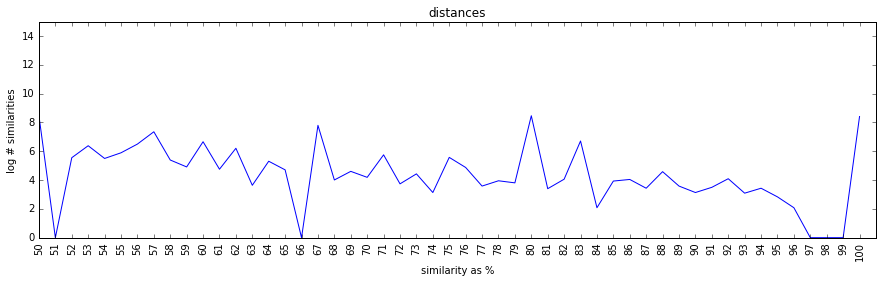

In [28]:
do_experiment(False, 'verse', 'SET', 60, False)
distances = collections.Counter()
for (x, d) in chunk_dist.items():
    distances[int(round(d))] += 1

x = range(MATRIX_THRESHOLD, 101)
fig = plt.figure(figsize=[15, 4])
plt.plot(x, [math.log(max((1, distances[y]))) for y in x], 'b-')
plt.axis([MATRIX_THRESHOLD, 101, 0, 15])
plt.xlabel('similarity as %')
plt.ylabel('log # similarities')
plt.xticks(x, x, rotation='vertical')
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15);
plt.title('distances');

33m 46s CHUNKING (O verse): already chunked into 23213 chunks
33m 46s PREPARING (O verse LCS)
33m 47s PREPARING (O verse LCS): Done 23213 chunks.
33m 47s SIMILARITY (O verse LCS M>60): Loaded:   269 M (269410078) comparisons with 113614 entries in matrix
33m 47s SIMILARITY (O verse LCS M>60): similarities between 60.0 and 100.0. 4204 are 100%
33m 47s CLIQUES (O verse LCS M>60 S>60): fetching similars and chunk candidates
33m 47s CLIQUES (O verse LCS M>60 S>60): inspecting the similarity matrix
33m 47s CLIQUES (O verse LCS M>60 S>60): 113614 relevant similarities between 18941 passages
33m 47s CLIQUES (O verse LCS M>60 S>60): Loaded:   380 cliques out of  18941 chunks from 113614 comparisons
33m 47s CLIQUES (O verse LCS M>60 S>60): 18941 members in 380 cliques
33m 47s PRINT (O verse LCS M>60 S>60): sorting out cliques
33m 47s PRINT (O verse LCS M>60 S>60): formatting 380 cliques skipping 190 binary chapter diffs
33m 48s PRINT (O verse LCS M>60 S>60): formatted 380 cliques (8 files) skip

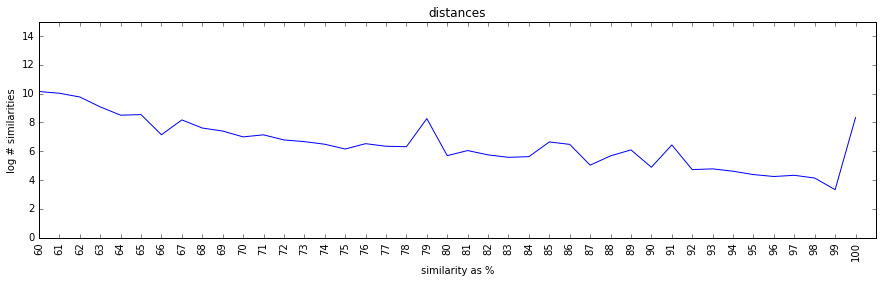

In [29]:
do_experiment(False, 'verse', 'LCS', 60, False)
distances = collections.Counter()
for (x, d) in chunk_dist.items():
    distances[int(round(d))] += 1

x = range(MATRIX_THRESHOLD, 101)
fig = plt.figure(figsize=[15, 4])
plt.plot(x, [math.log(max((1, distances[y]))) for y in x], 'b-')
plt.axis([MATRIX_THRESHOLD, 101, 0, 15])
plt.xlabel('similarity as %')
plt.ylabel('log # similarities')
plt.xticks(x, x, rotation='vertical')
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15);
plt.title('distances');